In [1]:
import importlib
import parse
import matplotlib.pyplot as plt
import statistics
from scipy.signal import savgol_filter
import datetime
from matplotlib.dates import DateFormatter, AutoDateLocator

In [2]:
_ = importlib.reload(parse)

In [ ]:
output_file = "output.txt"
target_ip = "94.140.14.14"
gateway_ip = "100.64.0.1"

In [4]:
measurements = parse.parse_measurements(output_file, target_ip)

# Measurement Counts

## Total

In [5]:
total_measurements = len(measurements)
print(f"Total measurements: {total_measurements}")

Total measurements: 17240


## By Probe ID

In [6]:
measurements_by_probe_id = {}
for measurement in measurements:
    if measurement.id not in measurements_by_probe_id:
        measurements_by_probe_id[measurement.id] = []
    measurements_by_probe_id[measurement.id].append(measurement)

In [7]:
for probe_id, probe_measurements in measurements_by_probe_id.items():
    print(f"Probe ID: {probe_id},\tMeasurement count: {len(probe_measurements)}")

Probe ID: 1007159,	Measurement count: 711
Probe ID: 1006295,	Measurement count: 882
Probe ID: 1006477,	Measurement count: 882
Probe ID: 1006896,	Measurement count: 882
Probe ID: 1006948,	Measurement count: 882
Probe ID: 1007645,	Measurement count: 879
Probe ID: 1008228,	Measurement count: 882
Probe ID: 1008786,	Measurement count: 882
Probe ID: 1009988,	Measurement count: 882
Probe ID: 1010332,	Measurement count: 881
Probe ID: 1010769,	Measurement count: 784
Probe ID: 1011217,	Measurement count: 882
Probe ID: 13040,	Measurement count: 882
Probe ID: 28430,	Measurement count: 881
Probe ID: 51136,	Measurement count: 882
Probe ID: 60323,	Measurement count: 798
Probe ID: 62613,	Measurement count: 843
Probe ID: 63017,	Measurement count: 882
Probe ID: 63025,	Measurement count: 882
Probe ID: 64237,	Measurement count: 879


## By Probe ID

# Successful vs Unsuccessful Measurements

## Total

## By Probe ID

In [8]:
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_count = sum(1 for m in probe_measurements if m.reached_target)
    unsuccessful_count = len(probe_measurements) - successful_count
    print(f"Probe ID: {probe_id},\tSuccessful: {successful_count},\tUnsuccessful: {unsuccessful_count}")

Probe ID: 1007159,	Successful: 709,	Unsuccessful: 2
Probe ID: 1006295,	Successful: 879,	Unsuccessful: 3
Probe ID: 1006477,	Successful: 881,	Unsuccessful: 1
Probe ID: 1006896,	Successful: 882,	Unsuccessful: 0
Probe ID: 1006948,	Successful: 869,	Unsuccessful: 13
Probe ID: 1007645,	Successful: 878,	Unsuccessful: 1
Probe ID: 1008228,	Successful: 881,	Unsuccessful: 1
Probe ID: 1008786,	Successful: 880,	Unsuccessful: 2
Probe ID: 1009988,	Successful: 879,	Unsuccessful: 3
Probe ID: 1010332,	Successful: 879,	Unsuccessful: 2
Probe ID: 1010769,	Successful: 784,	Unsuccessful: 0
Probe ID: 1011217,	Successful: 880,	Unsuccessful: 2
Probe ID: 13040,	Successful: 878,	Unsuccessful: 4
Probe ID: 28430,	Successful: 775,	Unsuccessful: 106
Probe ID: 51136,	Successful: 870,	Unsuccessful: 12
Probe ID: 60323,	Successful: 798,	Unsuccessful: 0
Probe ID: 62613,	Successful: 799,	Unsuccessful: 44
Probe ID: 63017,	Successful: 880,	Unsuccessful: 2
Probe ID: 63025,	Successful: 878,	Unsuccessful: 4
Probe ID: 64237,	Succ

## By Probe ID

# Gateway Visibility

## Total

Measurements where gateway IP (100.64.0.1) is present:	14205
Measurements where gateway IP (100.64.0.1) is absent:	3035
Figure size: 6.4 x 4.8 inches


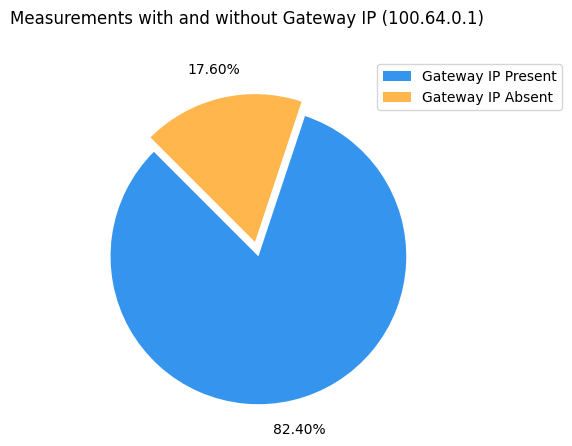

In [9]:
gateway_present, gateway_absent = parse.get_probe_measurements_with_and_without_ip(measurements, gateway_ip)
print(f"Measurements where gateway IP ({gateway_ip}) is present:\t{len(gateway_present)}")
print(f"Measurements where gateway IP ({gateway_ip}) is absent:\t{len(gateway_absent)}")

fig, ax1 = plt.subplots()
labels = ['Gateway IP Present', 'Gateway IP Absent']
sizes = [len(gateway_present), len(gateway_absent)]
colors = ["#3595EE", "#FFB74D"]
explode = (0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.35, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ')')

# get fig size in the same units passed to the `subplots` function
fig_size = fig.get_size_inches()
print(f"Figure size: {fig_size[0]} x {fig_size[1]} inches")


## Total (with Success or Failure)

Successful measurements where gateway IP (100.64.0.1) is present: 14188
Successful measurements where gateway IP (100.64.0.1) is absent: 2698
Unsuccessful measurements where gateway IP (100.64.0.1) is present: 17
Unsuccessful measurements where gateway IP (100.64.0.1) is absent: 337


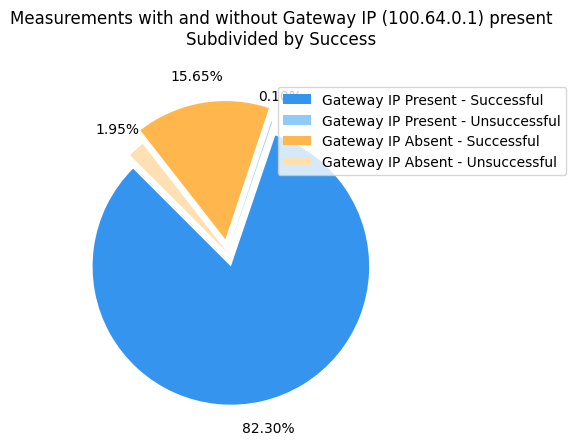

In [10]:
gateway_present_successful = [m for m in gateway_present if m.reached_target]
gateway_present_unsuccessful = [m for m in gateway_present if not m.reached_target]
gateway_absent_successful = [m for m in gateway_absent if m.reached_target]
gateway_absent_unsuccessful = [m for m in gateway_absent if not m.reached_target]
print(f"Successful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_successful)}")
print(f"Successful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_successful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_unsuccessful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_unsuccessful)}")
fig, ax1 = plt.subplots(figsize=(6, 4.5))
labels = ['Gateway IP Present - Successful', 'Gateway IP Present - Unsuccessful',
          'Gateway IP Absent - Successful', 'Gateway IP Absent - Unsuccessful']
sizes = [len(gateway_present_successful), len(gateway_present_unsuccessful),
         len(gateway_absent_successful), len(gateway_absent_unsuccessful)]
colors = ["#3595EE", "#90CAF9", "#FFB74D", "#FFE0B2"]
explode = (0.1, 0, 0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.5, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ') present\nSubdivided by Success')
_ = fig.tight_layout()

## By Probe ID
We continue with only the successful measurements

In [11]:
successful_measurements = []
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_measurements.extend([m for m in probe_measurements if m.reached_target])

successful_measurements_by_probe_id = {}
for measurement in successful_measurements:
    if measurement.id not in successful_measurements_by_probe_id:
        successful_measurements_by_probe_id[measurement.id] = []
    successful_measurements_by_probe_id[measurement.id].append(measurement)

In [12]:
successful_measurements_gateway_presence_per_probe_id = {probe_id: {"present": [], "absent": []} for probe_id in measurements_by_probe_id.keys()}
for probe_id, probe_measurements in successful_measurements_by_probe_id.items():
    present, absent = parse.get_probe_measurements_with_and_without_ip(probe_measurements, gateway_ip)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["present"].extend(present)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"].extend(absent)

# POP

Download the file like it descriped in the Readme

In [ ]:
MMDB_PATH="ipinfo_lite.mmdb"

In [15]:
probe_location_official = {
    "63025":"United States",
    "62613":"United States",
    "60323":"Germany",
    "13040":"France",
    "1007645":"Chile",
    "1006948":"United States",
    "51136":"United Kingdom",
    "1010332": "France",
    "1006477":"Philippines",
    "28430":"Italy",
    "1009988":"Philippines",
    "63017":"United States",
    "1011217":"Canada",
    "50524":"Indonesia",
    "1007159":"Haiti",
    "1006896":"Canada",
    "1010769":"Yemen",
    "1008228":"Kiribati",
    "1008786":"Madagascar",
    "64237": "Marshall Islands",
    "54141":"Colombia", 
    "25850":"United States", 
    "22645": "New Zealand"
}

In [16]:
import maxminddb
from typing import  Dict, Any

def lookup_ip_geolocation(ip, mmdb_path: str = MMDB_PATH):
    
    try:
        with maxminddb.open_database(mmdb_path) as reader:
                try:
                    ip_info = reader.get(ip)
                    
                    if ip_info is None:
                        result: Dict[str, Any] = {'ip': ip}
                    else:
                        result = {'ip': ip}
                        if isinstance(ip_info, dict):
                            result.update(ip_info)
                        else:
                            result['data'] = ip_info
                    
                    return result
                    
                except Exception as e:
                    print(e)
                    return {'ip': ip, 'error': f"Lookup error: {str(e)}"}

    except Exception as e:
        print(f"Error opening MMDB database {mmdb_path}: {e}")
        return {'ip': ip, 'error': f"Database error: {str(e)}"}



In [17]:
from collections import Counter
from typing import Any, Dict, List, Optional

def hop_avg_rtt_ms(hop) -> Optional[float]:
    rtts = getattr(hop, "rtt_times_ms", None)
    if not rtts:
        return None
    try:
        return sum(rtts)/len(rtts)
    except Exception:
        return None

def analyze_measurement_geo(
    measurement,
    lookup_fn,
    gateway_ip: str = "100.64.0.1",
    delta_ms: float = 2.0
) -> List[Dict[str, Any]]:
    
    gw_hop = None
    
    for h in measurement.hops:
        if h.ip == gateway_ip:
            gw_hop = h
            break

    if gw_hop is None:
        return []

    gw_rtt = hop_avg_rtt_ms(gw_hop)
    if gw_rtt is None:
        return []

    candidates = []
    for h in measurement.hops:
        if h is gw_hop:
            continue
        rtt = hop_avg_rtt_ms(h)
        if rtt is None:
            continue
        if "*" in h.ip:
            continue
        if abs(rtt - gw_rtt) <= delta_ms:
            rec = lookup_fn(h.ip)
            candidates.append({
                "ip": h.ip,
                "rtt_avg": rtt,
                **rec
            })
    
    return candidates

def summarize_probe_geo(
    measurements_for_probe,
    lookup_fn,
    gateway_ip = "100.64.0.1",
    delta_ms = 5.0
):
    country = Counter()
    continent = Counter()

    sample = None

    for m in measurements_for_probe:
        cands = analyze_measurement_geo(m, lookup_fn, gateway_ip=gateway_ip, delta_ms=delta_ms)
        for c in cands:
            if sample is None:
                sample = c
            if c.get("country"):
                country[c["country"]] += 1
            if c.get("continent"):
                continent[c["continent"]] += 1

    result = {
        "country": country.most_common(1)[0][0] if country else None,
        "continent": continent.most_common(1)[0][0] if continent else None,
    }
    return result

def summarize_all_probes_geo(
    successful_measurements_gateway_presence_per_probe_id: Dict[int, Dict[str, List[Any]]],
    lookup_fn,
    gateway_ip: str = "100.64.0.1",
    delta_ms: float = 2.0
) -> Dict[int, Dict[str, Any]]:
    out = {}
    for probe_id, buckets in successful_measurements_gateway_presence_per_probe_id.items():
        present = buckets.get("present", [])
        out[probe_id] = summarize_probe_geo(present, lookup_fn, gateway_ip=gateway_ip, delta_ms=delta_ms)
    return out

In [18]:
from typing import Dict, Any

def make_lookup_fn(mmdb_path: str):
    cache: Dict[str, Dict[str, Any]] = {}

    def lookup(ip: str) -> Dict[str, Any]:
        if ip in cache:
            return cache[ip]
        try:
            recs = lookup_ip_geolocation(ip, mmdb_path=mmdb_path)
            raw = recs if recs else {}
        except Exception:
            raw = {}
        
        cache[ip] = raw
        return raw

    return lookup


In [19]:

lookup_fn = make_lookup_fn(MMDB_PATH)

geo_summary = summarize_all_probes_geo(
    successful_measurements_gateway_presence_per_probe_id,
    lookup_fn=lookup_fn,
)




In [20]:
import pandas as pd
df_geo = pd.DataFrame(
    [{"probe_id": pid, **info} for pid, info in geo_summary.items()]
)
print(df_geo)

   probe_id         country      continent
0   1007159   United States  North America
1   1006295            None           None
2   1006477            None           None
3   1006896          Canada  North America
4   1006948            None           None
5   1007645           Chile  South America
6   1008228     New Zealand        Oceania
7   1008786    South Africa         Africa
8   1009988     Philippines           Asia
9   1010332  United Kingdom         Europe
10  1010769         Germany         Europe
11  1011217          Canada  North America
12    13040           Italy         Europe
13    28430           Italy         Europe
14    51136  United Kingdom         Europe
15    60323         Germany         Europe
16    62613   United States  North America
17    63017   United States  North America
18    63025   United States  North America
19    64237           Japan           Asia


In [21]:
import pandas as pd

def summarize_table(results_by_probe: dict, probe_location_official: dict):
    rows = []
    for pid, res in results_by_probe.items():
        official = probe_location_official.get(str(pid), "")
        determined = res.get("country", "") if res else ""
        match = bool(
            official and determined and official.strip().lower() == determined.strip().lower()
        )
        rows.append((str(pid), official, determined, match))

    def _probe_key(r):
        try:
            return int(r[0])
        except ValueError:
            return r[0]

    rows.sort(key=_probe_key)
    df = pd.DataFrame(rows, columns=["ProbeID", "Official Location", "Home-PoP Location", "Match"])
    return df

df_locations = summarize_table(geo_summary, probe_location_official)

print(df_locations)


    ProbeID Official Location Home-PoP Location  Match
0     13040            France             Italy  False
1     28430             Italy             Italy   True
2     51136    United Kingdom    United Kingdom   True
3     60323           Germany           Germany   True
4     62613     United States     United States   True
5     63017     United States     United States   True
6     63025     United States     United States   True
7     64237  Marshall Islands             Japan  False
8   1006295                                None  False
9   1006477       Philippines              None  False
10  1006896            Canada            Canada   True
11  1006948     United States              None  False
12  1007159             Haiti     United States  False
13  1007645             Chile             Chile   True
14  1008228          Kiribati       New Zealand  False
15  1008786        Madagascar      South Africa  False
16  1009988       Philippines       Philippines   True
17  101033

### Latex-Table

In [22]:

latex_table = df_locations.to_latex(index=False, escape=True)

print(latex_table)

\begin{tabular}{lllr}
\toprule
ProbeID & Official Location & Home-PoP Location & Match \\
\midrule
13040 & France & Italy & False \\
28430 & Italy & Italy & True \\
51136 & United Kingdom & United Kingdom & True \\
60323 & Germany & Germany & True \\
62613 & United States & United States & True \\
63017 & United States & United States & True \\
63025 & United States & United States & True \\
64237 & Marshall Islands & Japan & False \\
1006295 &  & NaN & False \\
1006477 & Philippines & NaN & False \\
1006896 & Canada & Canada & True \\
1006948 & United States & NaN & False \\
1007159 & Haiti & United States & False \\
1007645 & Chile & Chile & True \\
1008228 & Kiribati & New Zealand & False \\
1008786 & Madagascar & South Africa & False \\
1009988 & Philippines & Philippines & True \\
1010332 & France & United Kingdom & False \\
1010769 & Yemen & Germany & False \\
1011217 & Canada & Canada & True \\
\bottomrule
\end{tabular}



In [23]:
with open("quadnine_measurement.tex", "w", encoding="utf-8") as f:
    f.write(latex_table)